# Test YOLO Model pada Gambar dari Folder
Notebook ini digunakan untuk melakukan pengujian model YOLO hasil training (`best.pt`) pada gambar-gambar yang diambil dari sebuah folder.

In [15]:
# Import library yang dibutuhkan
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

In [16]:
# Load model hasil training
model = YOLO("runs/train/exp/weights/best.pt")

In [ ]:
# Tentukan path folder gambar
folder_path = "test_images" 

# Ambil semua file gambar dalam folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
print(f"Jumlah gambar ditemukan: {len(image_files)}")

Jumlah gambar ditemukan: 2



0: 288x640 4 Bad Pears, 76.2ms
Speed: 35.1ms preprocess, 76.2ms inference, 52.2ms postprocess per image at shape (1, 3, 288, 640)
0: 288x640 4 Bad Pears, 76.2ms
Speed: 35.1ms preprocess, 76.2ms inference, 52.2ms postprocess per image at shape (1, 3, 288, 640)


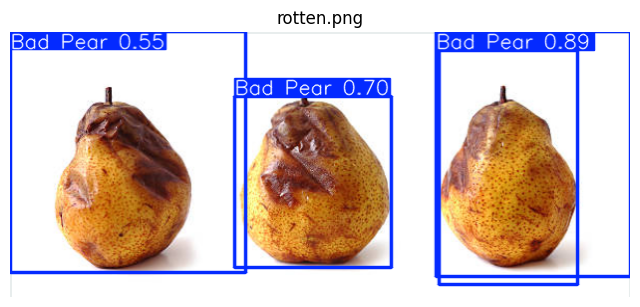


0: 640x640 2 Good Pears, 113.0ms
Speed: 9.9ms preprocess, 113.0ms inference, 14.3ms postprocess per image at shape (1, 3, 640, 640)
0: 640x640 2 Good Pears, 113.0ms
Speed: 9.9ms preprocess, 113.0ms inference, 14.3ms postprocess per image at shape (1, 3, 640, 640)


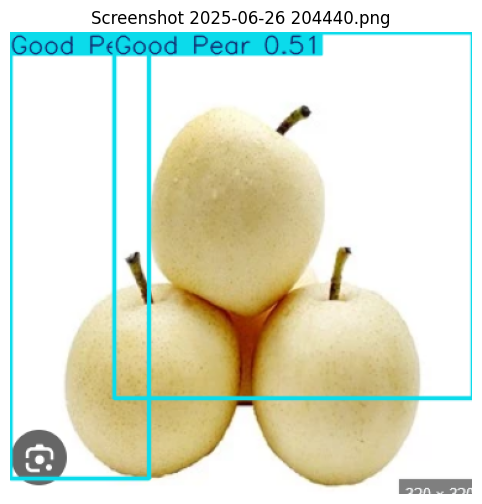

In [18]:
# Lakukan deteksi pada setiap gambar di folder
for img_name in image_files:
    img_path = os.path.join(folder_path, img_name)
    img = cv2.imread(img_path)
    if img is None:
        print(f"Gagal membaca gambar: {img_name}")
        continue

    # Deteksi objek pada gambar
    results = model(img)
    annotated_img = results[0].plot()

    # Tampilkan hasil deteksi
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    plt.title(img_name)
    plt.axis('off')
    plt.show()